In [2]:
import sys 
import os

sys.path.append("../src")
from skeleton_code import *

/Users/chaaland/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Problem 2.2 #

Given the objective function 
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x_i) - y_i\right)^2 $$
where $h_\theta(x) = \theta^T x + b$ we can rewrite this as a least squares problem in vector form

$$J(\theta) = \frac{1}{m}\left\lVert X\theta  - y \right\rVert^2$$

where $X\in \mathbf{R}^{m \times (d+1)}$ has the data in rows with an extra column of ones appended.

The gradient of the objective is found by expanding the cost function first into a quadratic form

$$
\begin{align*}
    \nabla J(\theta) &= \nabla_\theta \frac{1}{m}||X\theta - y||^2\\
    &= \frac{1}{m}\nabla_\theta \left(\theta^TX^TX\theta - 2y^TX\theta + y^Ty\right)\\
    &= \frac{2}{m}X^TX\theta - 2X^Ty\\
    &= \frac{2}{m}X^T(X\theta - y)
\end{align*}
$$

Performing optimization we seek a descent direction $h$ to decrease the cost of the objective. Writing down the linearization of $J(\theta)$ we have

$$
\begin{align*}
J(\theta_0 + \eta h) &= J(\theta_0) + (\nabla J(\theta_0))^T (\eta h)\\
J(\theta_0 + \eta h) - J(\theta_0) &= \frac{2}{m}\eta(X\theta - y)^TXh\\
\end{align*}
$$

The gradient descent iteration then given by 
$$
\begin{align*}
\theta^{k+1} &= \theta^{k} - \eta \nabla_\theta J(\theta^{k})\\
&= \theta^{k} - \eta\frac{2}{m} X^T(X\theta^{k} - y)\\
\end{align*}
$$

In [2]:
np.random.seed(19479160)

N = 10
theta = np.array([[1], [0.5]])
Xexample = np.hstack([5*np.random.rand(N,1), np.ones((N,1))])
yexample = Xexample.dot(theta) + 0.2*np.random.randn(N,1)
                                              

In [3]:
true_theta = np.linalg.lstsq(Xexample, yexample, rcond=None)[0]

In [4]:
np.random.seed(19479160)
theta_hist, loss_hist, stepsize_hist = batch_grad_descent(Xexample, np.squeeze(yexample), 0.01)

In [5]:
np.random.seed(19479160)
theta_hist_backtrack, loss_hist_backtrack, stepsize_hist_backtrack = batch_grad_descent(Xexample, np.squeeze(yexample), backtracking=True)

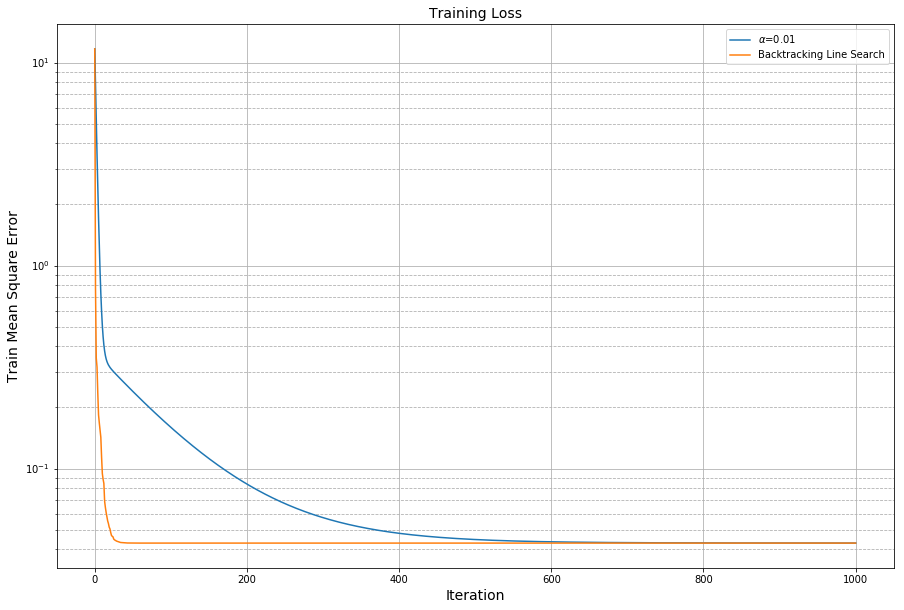

In [6]:
plt.figure(figsize=(15,10))

plt.semilogy(loss_hist,label=r"$\alpha$=0.01")
plt.semilogy(loss_hist_backtrack, label="Backtracking Line Search")

plt.title('Training Loss', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Train Mean Square Error', fontsize=14)
plt.legend()

plt.grid(True)
plt.grid(b=True, which='minor', linestyle='--')

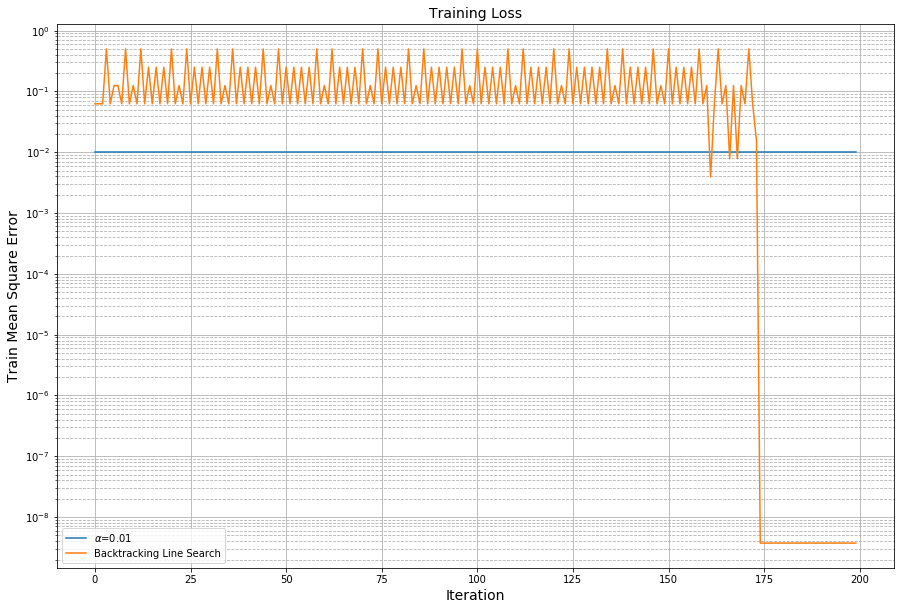

In [7]:
plt.figure(figsize=(15,10))

plt.semilogy(stepsize_hist[:200],label=r"$\alpha$=0.01")
plt.semilogy(stepsize_hist_backtrack[:200], label="Backtracking Line Search")

plt.title('Training Loss', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Train Mean Square Error', fontsize=14)
plt.legend()

plt.grid(True)
plt.grid(b=True, which='minor', linestyle='--')

In [8]:
x = np.linspace(-0.5, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        theta1 = X[i][j]
        theta2 = Y[i][j]
        Z[i,j] = compute_square_loss(Xexample, np.squeeze(yexample), np.array([theta1, theta2]))


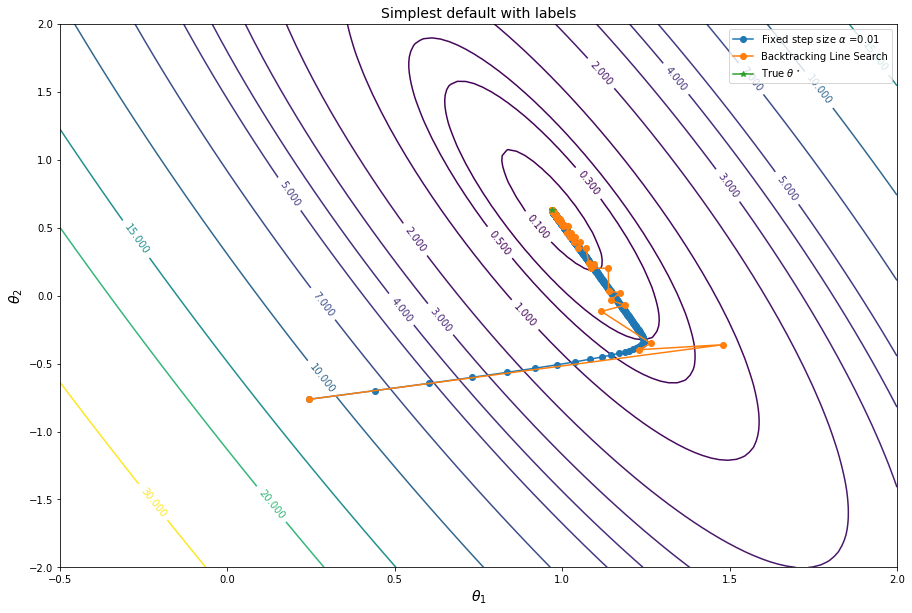

In [9]:
plt.figure(figsize=(15,10));

CS = plt.contour(X, Y, Z, [0.03, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30]);
plt.clabel(CS, inline=1, fontsize=10);
plt.plot(theta_hist[:,0], theta_hist[:,1],marker="o", label=r"Fixed step size $\alpha$ =0.01");
plt.plot(theta_hist_backtrack[:,0], theta_hist_backtrack[:,1],marker="o",label="Backtracking Line Search");
plt.plot(true_theta[0],true_theta[1], marker='*', label=r'True $\theta^\star$');


plt.title('Simplest default with labels', fontsize=14);
plt.xlabel(r'$\theta_1$', fontsize=14);
plt.ylabel(r'$\theta_2$', fontsize=14);
plt.legend();

# Problem 2.4 #

In [10]:
#Loading the dataset
print('loading the dataset')

curr_path = os.path.dirname(os.path.realpath('__file__'))
data_file = os.path.join(curr_path, '..','data','data.csv')
df = pd.read_csv(data_file, delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))     # Add bias term

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


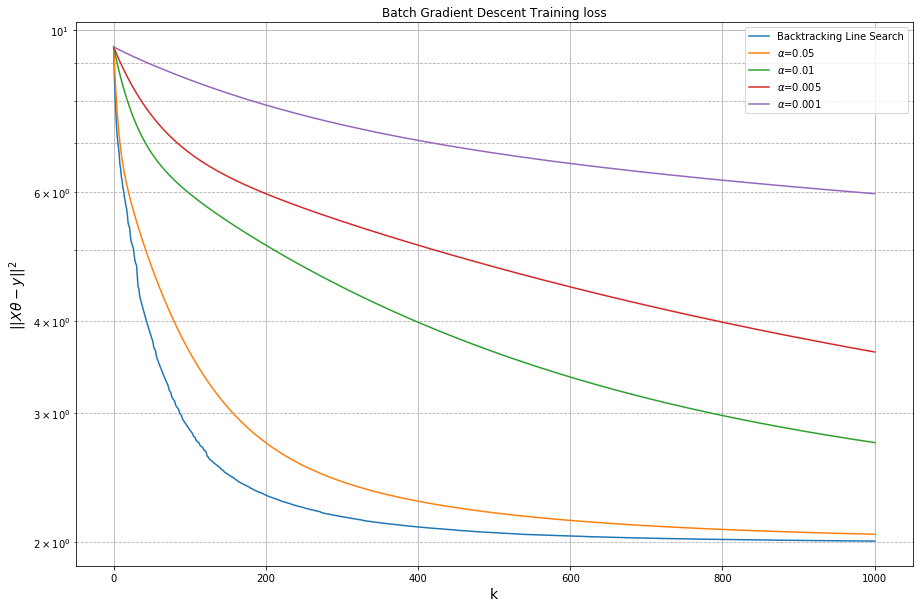

In [11]:
plt.figure(figsize=(15,10));

iters = 1000

np.random.seed(67840)
theta_hist_backtrack, loss_hist_backtrack, _ = batch_grad_descent(X_train, y_train, backtracking=True, num_iter=iters)
plt.semilogy(loss_hist_backtrack, label='Backtracking Line Search');

for a in [0.05, 0.01, 0.005, 0.001]:
    np.random.seed(67840)
    theta_hist, loss_hist , _ = batch_grad_descent(X_train, y_train, alpha=a, num_iter=iters)
    plt.semilogy(np.arange(iters + 1), loss_hist, label=r'$\alpha$={}'.format(a));

plt.title('Batch Gradient Descent Training loss');
plt.xlabel('k', fontsize=14);
plt.ylabel(r'$||X\theta - y||^2$', fontsize=14);

plt.grid(True, which='major');
plt.grid(b=True, which='minor', linestyle='--');
plt.legend();

plt.savefig(os.path.join('..','imgs','training_loss.png'))

# Problem 2.5 #

The regularized least squares model has objective 
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m (h_\theta(x_i)-y_i)^2 + \lambda \theta^T\theta $$

In vector form this is $J(\theta) = \frac{1}{m}||X\theta - y||^2 +\lambda ||\theta||^2$. The gradient is then just $\nabla_\theta J(\theta) = \frac{1}{m}X^T(X\theta - y) + \lambda \theta$

To avoid regularizing the bias term, we can replace the column of ones in the design matrix with a column of $B$'s which we can make arbitrarily large. Specifically the objective becomes

$$ J(\theta) = \left\lVert\tilde{X}\tilde{\theta} + \theta_{d+1}B\cdot \mathbf{1} - y\right\rVert^2 + \lambda \theta_{d+1}^2 + \lambda ||\tilde{\theta}||^2$$

Assuming the optimal value of the regularized least squares without the bias term is $\theta_{d+1}^\star$ then it's clear $\theta_{d+1} = \theta_{d+1}^\star / B$. As $B \rightarrow \infty$, the value of $\theta_{d+1}$ decreases and the regularization penalty tends to 0

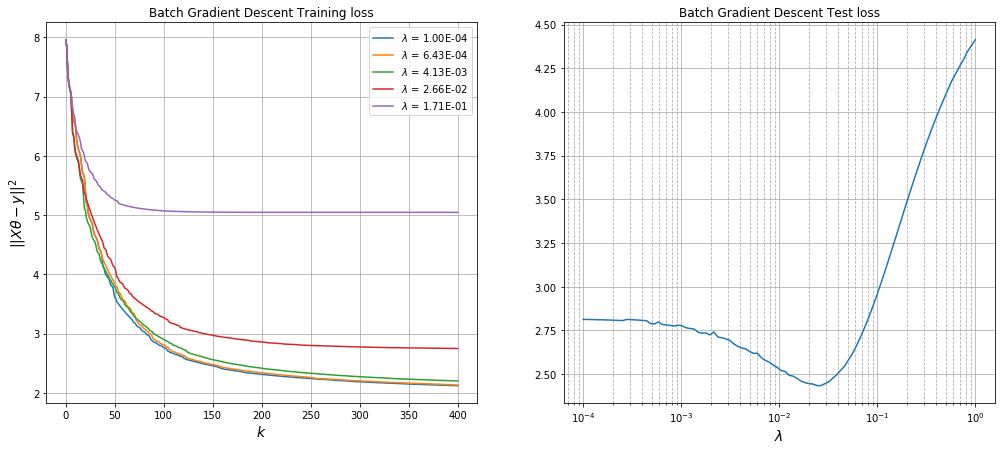

In [12]:
plt.figure(figsize=(17,7));

lambda_vals = 10**np.linspace(-4,0,100)
test_loss = np.zeros_like(lambda_vals)

plt.subplot(121);
for i,lam in enumerate(lambda_vals):
    theta_hist_reg, loss_hist_reg, _ = regularized_grad_descent(X_train, y_train, backtracking=True, num_iter=400, lambda_reg=lam)
    if i%20 == 0:
        plt.plot(loss_hist_reg, label=r'$\lambda$ = {0:.2E}'.format(lam));
    test_loss[i] = compute_square_loss(X_test, y_test, theta_hist_reg[-1,:])

plt.grid(True, which='major');
plt.grid(b=True, which='minor', linestyle='--');
plt.legend();

plt.title('Batch Gradient Descent Training loss');
plt.xlabel(r'$k$', fontsize=14);
plt.ylabel(r'$||X\theta - y||^2$', fontsize=14);

plt.subplot(122);
plt.semilogx(lambda_vals, test_loss);
plt.title('Batch Gradient Descent Test loss');
plt.xlabel(r'$\lambda$', fontsize=14);

plt.grid(True, which='major');
plt.grid(b=True, which='minor', linestyle='--');

# Problem 2.6 #

The regularized loss function can be written as 
$$J(\theta) = \frac{1}{m} \sum_{i=1}^m f_i(\theta)$$
where $f_i(\theta) = (h_\theta(x_i) - y_i)^2+ \lambda ||\theta||^2$

To show that $\nabla f_i(\theta)$ is an unbiased estiamtor of the gradient we compute its expectation

\begin{align*}
\mathbf{E}[\nabla f_i(\theta)] &= \sum_{k=1}^m \mathbf{prob}(k=i)\nabla f_k(\theta)\\
&=\frac{1}{m}\sum_{k=1}^m \nabla f_k(\theta)\\
&=\frac{1}{m}\nabla \left(\sum_{k=1}^m f_k(\theta)\right)\\
&= \nabla J(\theta)
\end{align*}


The stochastic update rule is 
\begin{align*}
\theta^{(k+1)}_j &= \theta^{(k)}_j - \alpha \nabla f_i(\theta^{(k)})\\
&= \theta^{(k)}_j - \alpha \left( 2\cdot ((\theta^{(k)})^Tx_i-y_i)\cdot x_{ij} + 2\lambda \theta^{(k)}_j\right)\\
\end{align*}

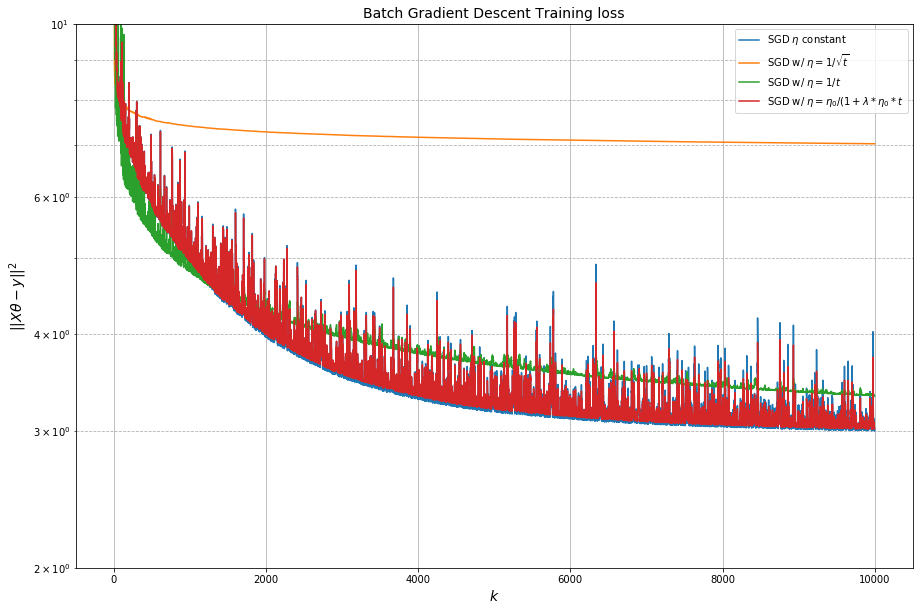

In [15]:
plt.figure(figsize=(15,10));

np.random.seed(591036)
_, loss_hist_stochastic = stochastic_grad_descent(X_train, y_train, 
                                                  alpha=0.01/4, 
                                                  num_iter=100, 
                                                  lambda_reg=0.01)
np.random.seed(591036)
_, loss_hist_stochastic_inv = stochastic_grad_descent(X_train, y_train, 
                                                      alpha='inv', 
                                                      num_iter=100, 
                                                      lambda_reg=0.01)
np.random.seed(591036)
_, loss_hist_stochastic_invsqrt = stochastic_grad_descent(X_train, y_train, 
                                                          alpha='invsqrt', 
                                                          num_iter=100, 
                                                          lambda_reg=0.01)

np.random.seed(591036)
_, loss_hist_stochastic_rational = stochastic_grad_descent(X_train, y_train, 
                                                          alpha='rational', 
                                                          num_iter=100, 
                                                          lambda_reg=0.01)

plt.semilogy(loss_hist_stochastic.reshape(loss_hist_stochastic.size), label=r'SGD $\eta$ constant')
plt.semilogy(loss_hist_stochastic_inv.reshape(loss_hist_stochastic_inv.size), label=r'SGD w/ $\eta=1/\sqrt{t}$')
plt.semilogy(loss_hist_stochastic_invsqrt.reshape(loss_hist_stochastic_invsqrt.size), label=r'SGD w/ $\eta=1/t$')
plt.semilogy(loss_hist_stochastic_rational.reshape(loss_hist_stochastic_rational.size), label=r'SGD w/ $\eta=\eta_0/(1+\lambda * \eta_0 *t)$')

plt.grid(True, which='major');
plt.grid(b=True, which='minor', linestyle='--');
plt.legend();

plt.title('Batch Gradient Descent Training loss', fontsize=14);
plt.xlabel(r'$k$', fontsize=14);
plt.ylabel(r'$||X\theta - y||^2$', fontsize=14);

plt.grid(True, which='major');
plt.grid(b=True, which='minor', linestyle='--');

plt.ylim([2,10]);

# Problem 3.1 #

Let $y$ be a random variable and consider the square loss $\ell(a,y) = (a - y)^2$ to find the empirical risk minimizer $a^\star = \arg \min_a \mathbf{E}(a - y)^2$ we differentiate wrt $a$ and set to zero. Since the function is convex in $a$, this must be the minimum

\begin{align*}
    \frac{\mathrm{d}}{\mathrm{d}a} \mathbf{E}(a-y)^2 &= \frac{\mathrm{d}}{\mathrm{d}a} \left(\mathbf{E}\left[y^2\right]-2a\mathbf{E}\left[y\right] + a^2\right)\\
 0 &= 2\mathbf{E}\left[y\right]-2a\\
 a^\star = \mathbf{E}[y]
\end{align*}

When we are given an input $x$, then $y$ comes from the conditional distribution of $y$ given $x$. To minimize the empirical risk we seek the solution to the optimization problem 
$$ f^\star(x) = \arg \min_{f}\ \mathbf{E}\left[\left. (f(x) - y)^2\right| x\right] $$
To find the minimizer we add and subtract the conditional expectation and expand the squared terms

$$
\begin{align*}
    \mathbf{E}\left[\left. (f(x) - y)^2\right| x\right] &= \mathbf{E}\left[\left. \left(f(x) - \mathbf{E}[y|x] + \mathbf{E}[y|x]- y\right)^2\right| x\right] \\
        &= \mathbf{E}\left[\left.\left(f(x) - \mathbf{E}[y|x]\right)^2\right|x\right] + \mathbf{E}\left[\left.(\mathbf{E}[y|x]- y)^2\right|x\right] + 2 \mathbf{E}\left[\left.\left(f(x) - \mathbf{E}[y|x]\right)(\mathbf{E}[y|x]- y)\right|x\right]\\
        &= \mathbf{E}\left[\left.\left(f(x) - \mathbf{E}[y|x]\right)^2\right|x\right] + \mathbf{E}\left[\left.(\mathbf{E}[y|x]- y)^2\right|x\right]\\
\end{align*}
$$

Since the second term is constant as far as $f(x)$ it is evident that the first term is minimized by $f^\star(x) = \mathbf{E}[y|x]$

# Problem 3.2

Consider the absolute value loss $\ell(a,y) = |a-y|$. To find the empirical risk minimizer $a$ we solve the optimization problem

$$a^\star = \arg \min_{a} \mathbf{E}\left[|a-y|\right]$$


Consider a discrete random variable $y\in \mathcal{Y}$ with PMF $p_{Y}(y)$ where $y_1 < y_2 < \ldots < y_n$. Assume we have a fixed $a\in \mathbf{R}$ and it is perturbed by some value $\epsilon \in \mathbf{R}_{++}$ such that $y_k \le a+\epsilon \le y_{k+1}$

\begin{align*}
  \mathbf{E}[|a +\epsilon -y|] &= \sum_{i=1}^n |a+\epsilon-y_i|\cdot p_{Y}(y_i)\\
  &= \sum_{i=1}^k (a+\epsilon-y_i)\cdot p_{Y}(y_i) + \sum_{i=k+1}^n (y_i-a - \epsilon)\cdot p_{Y}(y_i)\\
  &= \left[\sum_{i=1}^k (a-y_i)\cdot p_{Y}(y_i) + \sum_{i=k+1}^n (y_i-a )\cdot p_{Y}(y_i)\right] + \left[\sum_{i=1}^k \epsilon \cdot p_{Y}(y_i) - \sum_{i=k+1}^N \epsilon \cdot p_{Y}(y_i) \right]\\
  &= \left[\sum_{i=1}^k |a-y_i|\cdot p_{Y}(y_i) + \sum_{i=k+1}^n |y_i-a| \cdot p_{Y}(y_i)\right] + \left[\sum_{i=1}^k \epsilon \cdot p_{Y}(y_i) - \sum_{i=k+1}^N \epsilon \cdot p_{Y}(y_i) \right]\\
  &= \left[\sum_{i=1}^N |y_i-a|\cdot p_{Y}(y_i)\right] + \epsilon\left[\sum_{i=1}^k p_{Y}(y_i) - \sum_{i=k+1}^N p_{Y}(y_i) \right]\\
\end{align*}

From the expression above we see that the second term on the right hand side will be negative if $a+\epsilon < \mathbf{median}(y)$ and positive if $a+\epsilon > \mathbf{median}(y)$. To achieve the minimum of the objective, we should continue increasing $\epsilon$ to achieve the smallest value of $a+\epsilon$ such that it is greater or equal to the median. At this point, the quantity $\left[\sum_{i=1}^k p_{Y}(y_i) - \sum_{i=k+1}^N p_{Y}(y_i) \right]$ changes signs from negative to positive, thus the objective will begin increasing. Since the problem is convex, this must be the minimum.

The continous case is much the same with integrals instead of summations and PDFs instead of PMFs.

In [51]:
np.random.seed(160497)
a = np.linspace(-5,5,100)

In [52]:
num_points = 6
p = np.random.rand(num_points)
p /= sum(p)
y = 10 * np.random.rand(num_points)

In [53]:
args_sort = np.argsort(y)

y_sorted = y[args_sort]
p_sorted = p[args_sort]

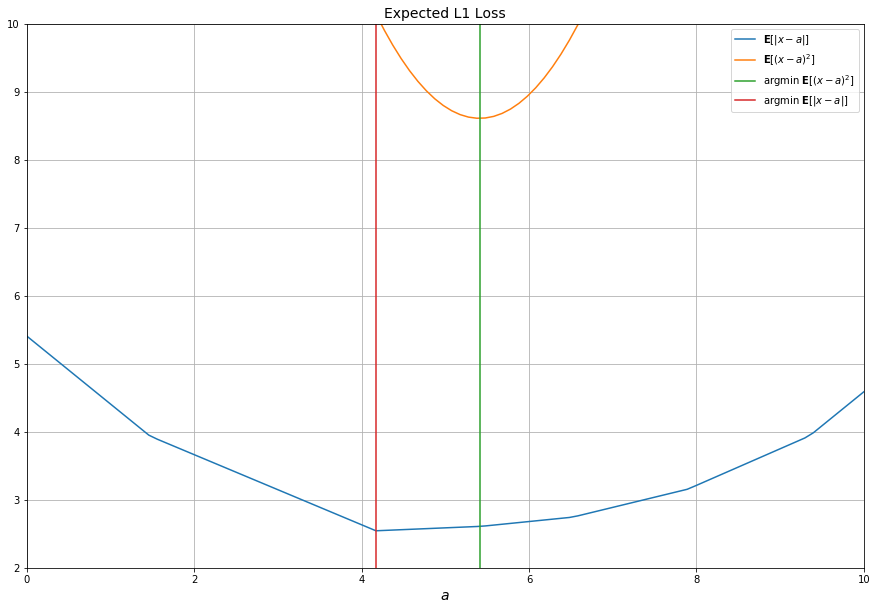

In [65]:
n = 200
a = np.linspace(-10,10, n)

plt.figure(figsize=(15,10));
expected_abs = [sum(p * np.abs(y-a[i])) for i in range(n)]
expected_squared = [sum(p * np.square(y-a[i])) for i in range(n)]

plt.plot(a, expected_abs,label=r'$\mathbf{E}[|x-a|]$');
plt.plot(a, expected_squared,label=r'$\mathbf{E}[(x-a)^2]$');

dist_mean = np.dot(p, y)

index_median = list(np.cumsum(p_sorted) > 0.5).index(True)
dist_median = y_sorted[index_median]

plt.plot([dist_mean, dist_mean], [0, 10], label=r'$\arg \min\ \mathbf{E}[(x-a)^2]$')
plt.plot([dist_median, dist_median], [0,10], label=r'$\arg \min \ \mathbf{E}[|x-a|]$')

plt.title('Expected L1 Loss', fontsize=14);
plt.xlabel(r'$a$', fontsize=14);

plt.grid(True, which='major');
plt.grid(b=True, which='minor', linestyle='--');

plt.xlim([0,10]);
plt.ylim([2,10]);

plt.legend();